<a href="https://colab.research.google.com/github/Sayma-sudo/senulationlab/blob/main/lab_7%2Cpart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean: 76.90
Population Variance: 136.09
Sample Variance: 143.25
Standard Deviation: 11.97


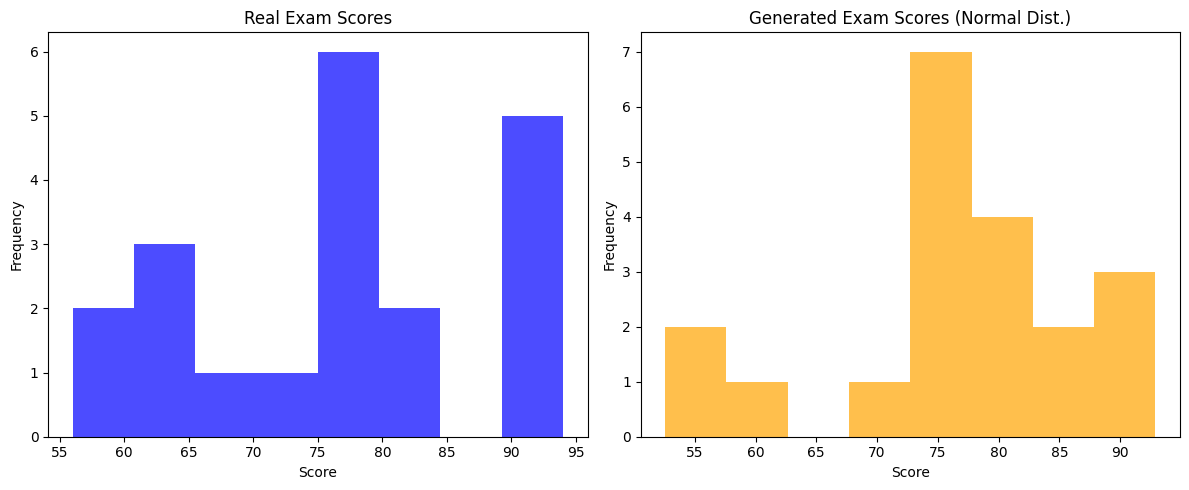

Estimated Probability P(X >= 75): 0.5641
One-sample t-test against mean = 60
t-statistic: 6.3147
p-value: 0.0000


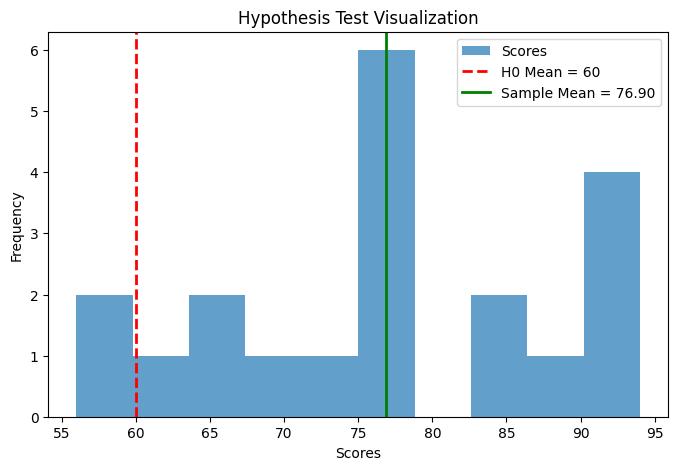

Conclusion: Reject the null hypothesis at 5% significance level.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Given exam scores
scores = np.array([93, 83, 69, 62, 75, 93, 73, 77, 65, 65,
                   78, 90, 94, 78, 57, 76, 56, 78, 84, 92])

# Step 1: Basic stats
mean_score = np.mean(scores)
var_population = np.var(scores)  # Population variance (ddof=0)
var_sample = np.var(scores, ddof=1)  # Sample variance (ddof=1)
std_dev = np.std(scores, ddof=1)  # Sample standard deviation

print(f"Mean: {mean_score:.2f}")
print(f"Population Variance: {var_population:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Step 3: Random data generation from normal distribution
generated_scores = np.random.normal(loc=mean_score, scale=std_dev, size=20)

# Step 4: Plot histograms side by side
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(scores, bins=8, color='blue', alpha=0.7)
plt.title("Real Exam Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(generated_scores, bins=8, color='orange', alpha=0.7)
plt.title("Generated Exam Scores (Normal Dist.)")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 5: Monte Carlo simulation to estimate P(X >= 75)
mc_samples = np.random.normal(loc=mean_score, scale=std_dev, size=100000)
prob_ge_75 = np.mean(mc_samples >= 75)
print(f"Estimated Probability P(X >= 75): {prob_ge_75:.4f}")

# Step 6: Hypothesis Testing
# Null Hypothesis mean = (last 3 digits of ID % 50) + 50
id_last3 = 60  # from your ID 1060
H0_mean = (id_last3 % 50) + 50  # 60 % 50 + 50 = 10 + 50 = 60

t_stat, p_value = ttest_1samp(scores, H0_mean)
print(f"One-sample t-test against mean = {H0_mean}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Visualization of hypothesis test
plt.figure(figsize=(8,5))
plt.hist(scores, bins=10, alpha=0.7, label="Scores")
plt.axvline(H0_mean, color='red', linestyle='dashed', linewidth=2, label=f'H0 Mean = {H0_mean}')
plt.axvline(mean_score, color='green', linestyle='solid', linewidth=2, label=f'Sample Mean = {mean_score:.2f}')
plt.legend()
plt.title("Hypothesis Test Visualization")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

# Interpretation
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis at 5% significance level.")
else:
    print("Conclusion: Fail to reject the null hypothesis at 5% significance level.")
